<h1><center> Unsupervised Machine Learning Models </center></h1>

This code combines the strengths of both unsupervised and supervised learning. The goal is to first identify groupings within the dataset through clustering and then using these groupings as labels for applying supervised classification models.

### Step 1: Unsupervised Learning with Clustering:
- **Data Preparation**: Standardizing the dataset.
- **Dimensionality Reduction**: Using Principal Component Analysis (PCA) to reduce the dimensionality of the data while preserving most of the variance. This helps in visualizing the clusters in a two-dimensional space.
- **Clustering**: Applying different clustering algorithms including K-Means, K-Medoids, Hierarchical Clustering, and Gaussian to identify patterns and group the data into clusters.

After the clusters are identified, each data point is assigned a cluster label.

### Step 2: Supervised Learning and Classification

The cluster labels are treated as the target variable, and the dataset is now used to train classification models. This step involves:

- **Model Training**: Training various classification algorithms (such as CART Trees, Support Vector Machines, Naive Bayes, and KNN using the labeled dataset. The models learn to predict the cluster label based on the original features of the dataset.
- **Model Evaluation**: Evaluating the performance of the classification models using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC. The goal is to determine how well the models can classify data points into their respective clusters.



In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
from matplotlib.patches import Ellipse
from scipy.cluster.hierarchy import linkage, dendrogram

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [97]:
class MachineLearningModels:
    
    def __init__(self, dataset):
        self.dataset = dataset
        self.output='Class'
        self.X = dataset.drop(columns=[self.output])
        self.y = dataset[self.output]
        self.num_clusters = len(self.y.unique())
        self.background_color = '#001C30' 
        self.primary_color = '#5ec3e1'  # Light blue from the logo
        self.secondary_color = '#1f78b4'  # Dark blue from the logo
        self.colors = ['#00BFFF',  '#4682B4','#e74c3c']
     

    
    def prepareData(self):
        #encode quantitative vars
        label_encoder = LabelEncoder()
        categorical = self.X.select_dtypes(include=['object']).columns
        self.X[categorical] = self.X[categorical].apply(lambda x: label_encoder.fit_transform(x))

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
    def barPlot(self,var):
        plt.figure(figsize=(10, 5))
        sns.countplot(data=self.dataset, x=var, hue=self.output, palette=self.colors)

        
        self.customize_plot(var,'Count',f'{var} Distribution by {self.output}')
        
        
    def histPlot(self,var):
        plt.figure(figsize=(10, 5))
        sns.histplot(data=self.dataset, x=var, hue=self.output, palette=self.colors)

        self.customize_plot(var,'Count',f'{var} Distribution by {self.output}')
    
    def boxPlot(self,var):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=var, y=self.output, data=self.dataset,palette=self.colors)

        self.customize_plot(var,self.output,f'Box Plot - {self.output} by {var}')
    def scatterPlot(self,var):
        plt.figure(figsize=(10, 5))
        plt.scatter(self.X[var], self.dataset['PPM'], c=self.secondary_color)

        self.customize_plot(var,'PPM',f'Scatter Plot - {var} vs PPM')
        

    def visualizeData(self):

            # Separate categorical and numerical variables
            categorical = self.X.select_dtypes(include=['object', 'category']).columns.tolist()
            numerical = self.X.select_dtypes(include=['int', 'float']).columns.tolist()

            
            for var in categorical: # Bar plot for categorical variables
                self.barPlot(var)

            for var in numerical: # Histogram for numerical variables
                self.histPlot(var)

                
    def plotHeatMap(self,yh,model):

        plt.figure(figsize=(10, 5))
        cm=pd.DataFrame(confusion_matrix(self.y_test, yh))
       # cm=cm.rename(columns={0:'Irregular',1:'Regular'},index={0:'Irregular',1:'Regular'})
        sns.heatmap(cm,cmap='Blues',annot=True,cbar=True,linewidths=1.5, linecolor='white',)

        plt.xticks(color=self.background_color, fontsize=8, rotation=0, ha='center', fontweight='bold')
        plt.yticks(color=self.background_color, fontsize=8, fontweight='bold')
    
        self.customize_plot('Predicted','Observed',f'{model} Observed vs. Predicted')
        
        
    def plotScatterplot(self,model,yh,rmse):

        plt.figure(figsize=(10, 5)) 
        sns.scatterplot(
            x=self.y_test, 
            y=yh, 
            label=f'RMSE: {rmse:.2f}',
            color='#5ec3e1' ,  # Use the primary color for scatter points
            edgecolor='#e74c3c'   # Optional: add edge color for better visibility
            )
        
          # Plot the reference line (ŷ = y)
        plt.plot(
            [self.y_test.min(), self.y_test.max()], 
            [self.y_test.min(), self.y_test.max()], 
            color='#e74c3c', 
            linestyle='--', 
            label='ŷ = y'
                )
        plt.legend( edgecolor='white', fontsize=10)
        
        self.customize_plot('Observed-y','Predicted-ŷ',f'{model} Observed vs. Predicted PPM values')
       
        
    def customize_plot(self, xlabel,ylabel, title):

        plt.xlabel(xlabel, color=self.background_color)
        plt.ylabel(ylabel, color=self.background_color)
        plt.title(title, color=self.background_color)
        plt.gca().set_facecolor(self.background_color)
        plt.tight_layout()
        plt.show()


    def ModelSummary(self,y_hat):
        
        #evaluate
        accuracy = accuracy_score(self.y_test, y_hat)   
        sensitivity = recall_score(self.y_test, y_hat,average='weighted')
        precision = precision_score(self.y_test, y_hat,average='weighted')
        
        #plotting           
        print("\033[1;34m  Model Evaluation:\033[0m")
        print(f"\tAccuracy: {accuracy*100} %")
        print(f"\tSensitivity: {sensitivity*100} %")
        print(f"\tPrecision: {precision*100} %")

#-------------------------------------------CLASSIFICATION MODELS--------------------------------------------------------------

    def LogisticRegression(self):
        
        #fit model
        regModel = LogisticRegression(random_state=0,multi_class='ovr',max_iter=1000).fit(self.X_train, self.y_train)
        #regModel=sm.Logit(self.y_train,sm.add_constant(self.X_train)).fit()

        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob = np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)
        
        #plotting           

      
        self.plotHeatMap(y_hat,'Logistic Regression')
        self.ModelSummary(y_hat)
        
        return accuracy

    def SVM(self):
        
        #fit model
        regModel = SVC(random_state=0,probability=True).fit(self.X_train, self.y_train)
        
        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob=np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)
        #plotting       
        self.plotHeatMap(y_hat,'Support Vector Machine')
        self.ModelSummary(y_hat)  

        return accuracy
    
    def NaiveBayes(self):
        
        #fit model
        regModel = GaussianNB().fit(self.X_train, self.y_train)
        
        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob=np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)

        #plotting         
        self.plotHeatMap(y_hat,'Naive Bayes')
        self.ModelSummary(y_hat)  
        
        return accuracy
    
    def KNNC(self):
        
        #fit model
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(self.X_train, self.y_train)

        #test model
        y_hat = knn.predict(self.X_test)
        y_prob = knn.predict_proba(self.X_test)[:, 1]
        accuracy = accuracy_score(self.y_test, y_hat)

        # Plotting
        self.plotHeatMap(y_hat, 'KNN')
        self.ModelSummary(y_hat) 
        
        return accuracy

    
    def CARTtreeC(self):
        
        #fit model
        regModel = DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=5,
                                         min_samples_split=3, min_samples_leaf=2, 
                                         min_weight_fraction_leaf=0, max_leaf_nodes=10, 
                                         min_impurity_decrease=0,class_weight=None).fit(self.X_train, self.y_train)
                                       
        
        #test model
        y_hat = regModel.predict(self.X_test)
        y_prob=np.array(regModel.predict_proba(self.X_test)[:,0])
        accuracy = accuracy_score(self.y_test, y_hat)

 
        self.plotHeatMap(y_hat,'CART Tree') 
        self.ModelSummary(y_hat)
        
        return accuracy

    
    def getModels(self):
        
        models = {
         
                'Support Vector Machine': self.SVM(),
                'Naive Bayes': self.NaiveBayes(),
                'KNN': self.KNNC(),
                'CART Tree': self.CARTtreeC()
               
                }

        return models

    def compare_models(self):
        
      
        self.prepareData() #encoding and splitting
        models=self.getModels() #either classification or regression
            
        print("\033[1;34m------------------------------------------------------------------------------------------------------------------------------\033[0m")
        print("\033[1;34m Comparing Models\033[0m")
        
        #Classification: check highest accuracy

        print("\033[31m\tClassification Accuracy:\033[0m")
        for model, accuracy in models.items():
                print(f"\t{model}: {accuracy*100} %")
                best=max(models, key=models.get)

        # Conclusion
        print(f"\033[1;34m  Best Model to predict {self.output}:\033[0m {best} ")




In [98]:
class UnsupervisedLearningModels:
    
    def __init__(self, data):
        
        self.data=data #original data
        self.num_data=self.get_numeric() #only numeric columns
        self.std_data = self.standardize_data() #standardized
        self.n_components=self.num_data.shape[1] #number of variables for PCA        
        self.distance_metric={'E': 'euclidean','M': 'manhattan','C': 'cosine','L1': 'l1','L2': 'l2'}
        self.linkage={'W': 'ward','C': 'compete','A': 'average','S': 'single'}

          
    def standardize_data(self):
        
        #standardizing numerical dataset
        scaler = StandardScaler()
        num_columns = self.num_data.columns
        data_num = scaler.fit_transform(self.num_data)
        data_num = pd.DataFrame(data_num, columns=num_columns)
        return data_num
    
    def get_numeric(self):
        
        #dropping categorical variables
        categorical = self.data.select_dtypes(include=['object']).columns 
        data_num = self.data.drop(columns=categorical)
        return data_num
    
    
    def gmm_clustering(self, n_clusters):
        
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        cluster_labels = gmm.fit_predict(self.std_data)
        
        self.visualize_clusters(cluster_labels,"gmm") 
        
        return cluster_labels
        
        
    def kmedoids_clustering(self, n_clusters,dis_metric):
        
        metric=self.distance_metric[dis_metric] #mapping chosen distance
        
        kmedoids = KMedoids(n_clusters=n_clusters, metric=metric, random_state=42)
        cluster_labels = kmedoids.fit_predict(self.std_data)
        
        self.visualize_clusters(cluster_labels, "kmedoids")
        
        
        return cluster_labels
        
    def kmeans_clustering(self, n_clusters):
        
        kmeans = KMeans(n_clusters=n_clusters, random_state=42) #mapping chosen distance
        cluster_labels=kmeans.fit_predict(self.std_data)
        
        centroids = kmeans.cluster_centers_
        centroids = pd.DataFrame(centroids, columns=self.num_data.columns)

        self.visualize_clusters(cluster_labels,"kmeans")
       
        return cluster_labels
        
    def agglomerative_clustering(self, n_clusters,distance,linkage):
        
        if(linkage=='W'):  #ward only with euclidean
            distance='E'
        
        linkage=self.linkage[linkage]
        metric=self.distance_metric[distance]
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage,affinity=metric)
        cluster_labels = agglomerative.fit_predict(self.std_data)
        
        self.visualize_clusters(cluster_labels,"agglomerative")
        self.hierarchical_clustering (linkage,cluster_labels)
        return cluster_labels
        
        
    def hierarchical_clustering(self,distance,labels):

        plt.figure(figsize=(10, 8))
        
        dendrogram = sch.dendrogram(sch.linkage(self.std_data,method=distance), 
                                    labels=labels)

       
        plt.title(f'Hierarchical Clustering Dendrogram using {distance.upper()} linkage')
        plt.ylabel('Linkage Distance')
        plt.tight_layout()
        plt.show()

        
    def visualize_clusters(self, labels,model):

        pca = PCA(n_components=self.n_components, random_state=42)
        reduced_data = pca.fit_transform(self.std_data)
        pc1=pca.explained_variance_ratio_[0]*100
        pc2=pca.explained_variance_ratio_[1]*100
        colors = ['#00BFFF',  '#4682B4','#e74c3c']

       
        reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i}' for i in range(1, self.n_components + 1)])
        reduced_df['cluster'] = labels

        plt.figure(figsize=(10, 8))

        sns.scatterplot(x=f'PC1', y=f'PC2', hue='cluster', data=reduced_df, palette=colors, legend='full')

        plt.title(f'{model.capitalize()} Clustering Visualization with PCA: {pc1 + pc2:.2f}% Explained Variance', color='#5ec3e1')
        plt.xlabel(f'PC1: {pc1:.2f}% Explained Variance', color='#1f78b4')
        plt.ylabel(f'PC2: {pc2:.2f}% Explained Variance', color='#1f78b4')
        plt.gca().set_facecolor('#001C30')
        plt.tight_layout()
        plt.show()
        


    def select_model(self, choice):           
            if choice == '1':
                
                return self.kmeans_clustering(int(input("Number of Clustres for KMeans: ")))
                
            elif choice == '3':
                
                return self.gmm_clustering(int(input("Number of Clustres for Gaussian Mixture Model ")))
                
            elif choice == '2':
                
                return self.kmedoids_clustering(
                        int(input("Number of Clustres for KMedoids  ")),
                        input('''Distance Metric:
                                 [E] Euclidean
                                 [M] Manhattan
                                 [C] Cosine
                                 [L1] L1
                                 [L2] L2'''))
                
            elif choice == '4':
              
                return self.agglomerative_clustering(
                    int(input("Number of Clustres Agglomerative Clustering")),
                    input('''Distance Metric:
                            [E] Euclidean
                            [M] Manhattan
                            [C] Cosine
                            [L1] L1
                            [L2] L2
                             '''),
                     input('''Linkage Distance:
                            [W] Ward
                            [C] Compete
                            [A] Average
                            [S] Single'''))

        
        

      
        
        
      

In [99]:
class DataScience:
    
        def __init__(self, dataset):
            self.dataset=dataset
            self.clustered_data=self.dataset
            self.unsupervised=UnsupervisedLearningModels(self.dataset)
        def explore_data(self):
            
            profile=ProfileReport(self.dataset,title="Pulse Report")
            profile.to_notebook_iframe()
            
        def apply_unsupervised(self):
            
            model_choice = input('''Select Clustering Model:
                            [1] KMeans
                            [2] KMedoids
                            [3] Gaussian Mixture Model
                            [4] Agglomerative Clustering ''')
            self.clustered_data['Class']=self.unsupervised.select_model(model_choice)
            
            
        def profile_data(self):
            supervised=MachineLearningModels(self.clustered_data) #ML models
            supervised.visualizeData()
        def apply_supervised(self):
            supervised=MachineLearningModels(self.clustered_data) #ML models
            #supervised.visualizeData()
            supervised.compare_models()

## Loading Data Set

In [100]:
pulse = pd.read_excel(r'Pulse.xlsx')
pulse = pulse.drop(['Patient'], axis=1)
pulse.rename(columns={'Sports activity': 'Sports', 'Pulse Per Minute': 'PPM'}, inplace=True)
myModel=DataScience(pulse)
pulse

,Gender,Age,Sports,Smoker,Illness,PPM,Beat Regularity,Respiratory Rate,Lower Tension,Upper Tension,Temperature,Place of Living
0,Male,13-45,Yes,Yes,Cardiac,100,Regular,18,9.5,17.5,37.0,North
1,Male,13-45,Yes,Yes,Cardiac,45,Irregular,16,3.5,6.5,36.2,North
2,Female,> 45,No,Yes,Cardiac,85,Regular,20,9.5,14.5,36.5,North
3,Female,> 45,No,No,Cardiac,75,Irregular,16,6.5,12.5,37.8,North
4,Female,> 45,No,Yes,Cardiac,89,Regular,22,8.5,16.5,38.0,North
...,...,...,...,...,...,...,...,...,...,...,...,...
642,Male,13-45,Yes,Yes,Diabetes,70,Regular,25,6.5,10.5,37.0,Mount Lebanon
643,Male,> 45,No,Yes,Cancer (E.S),89,Irregular,21,7.5,11.5,37.0,North
644,Female,13-45,No,No,Cancer (E.S),69,Regular,27,6.5,11.5,37.0,Beirut
645,Male,13-45,No,Yes,Cardiac,75,Irregular,15,8.5,12.5,36.8,Beirut


## Applying Different Clustering Model with options

Select Clustering Model:
                            [1] KMeans
                            [2] KMedoids
                            [3] Gaussian Mixture Model
                            [4] Agglomerative Clustering 3
Number of Clustres for Gaussian Mixture Model 3


C:\Users\Youya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


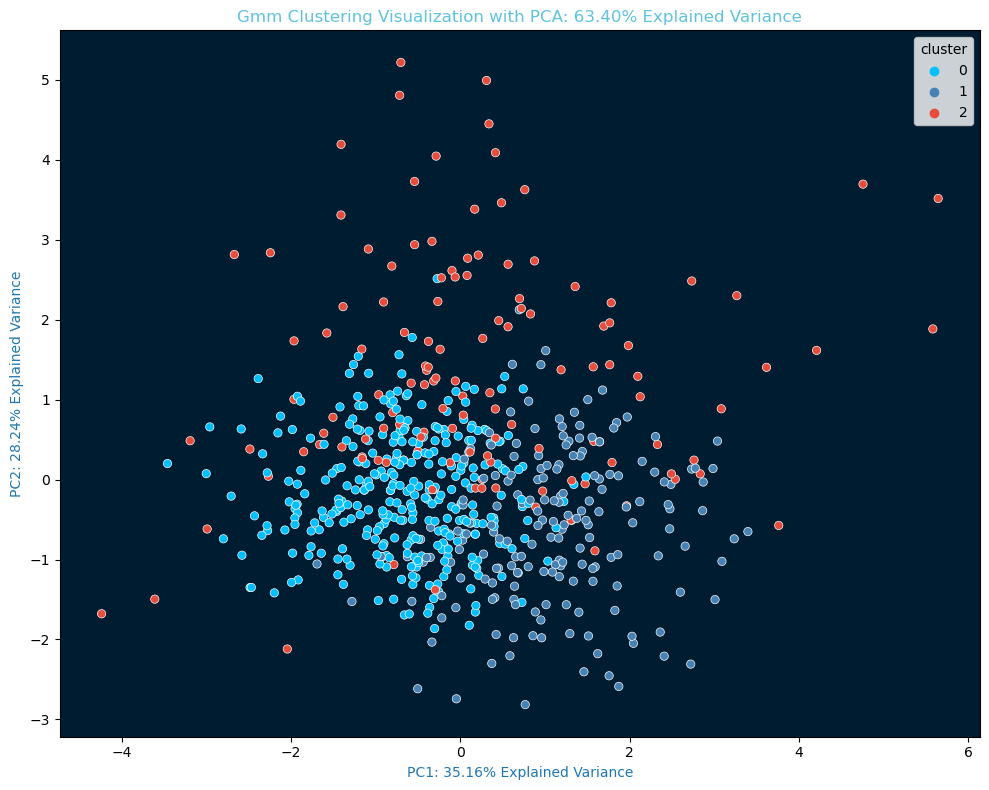

In [101]:
myModel.apply_unsupervised()

## Profiling Clustered Data 

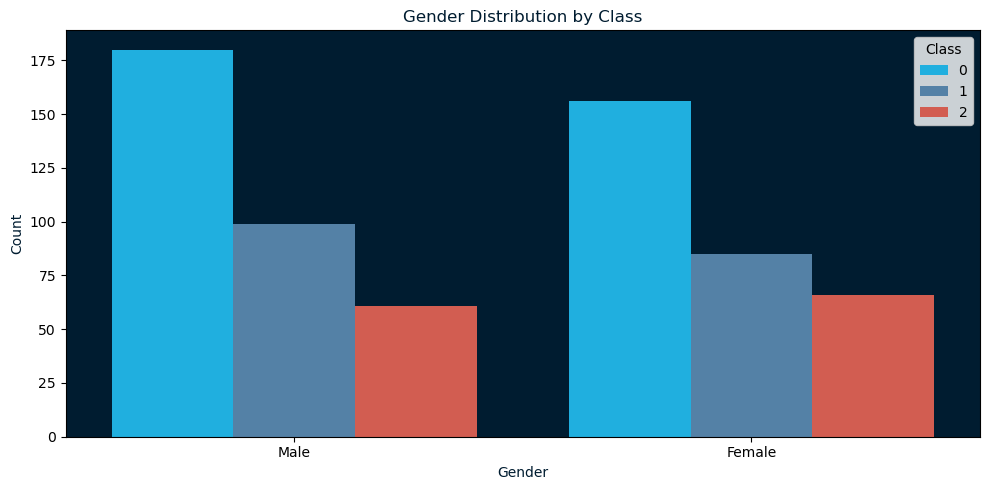

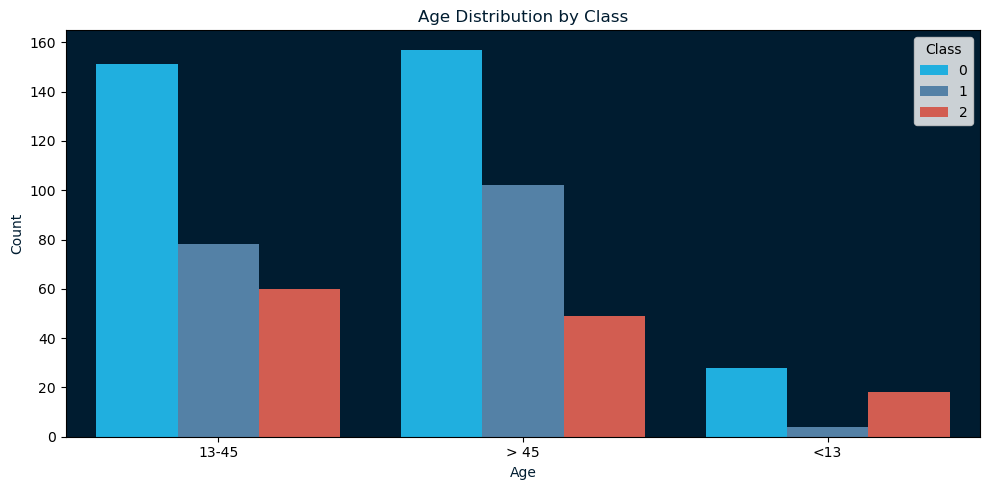

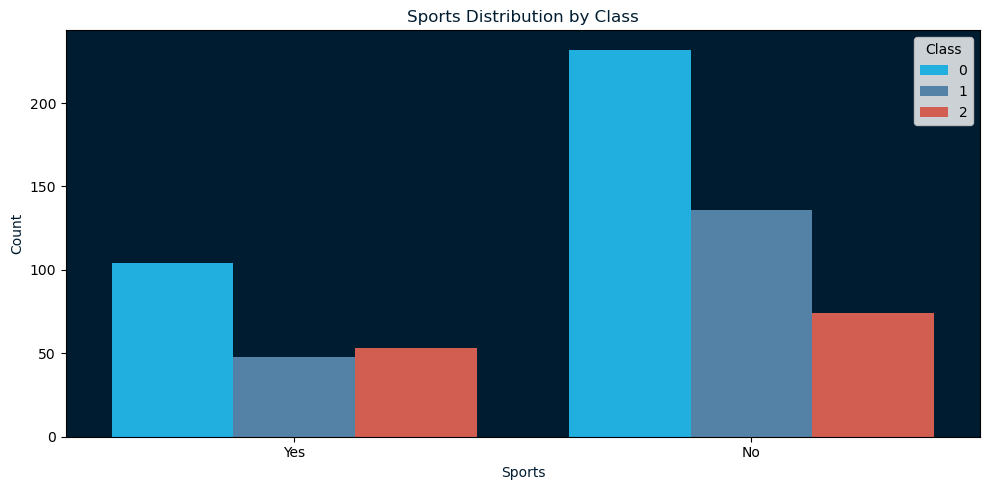

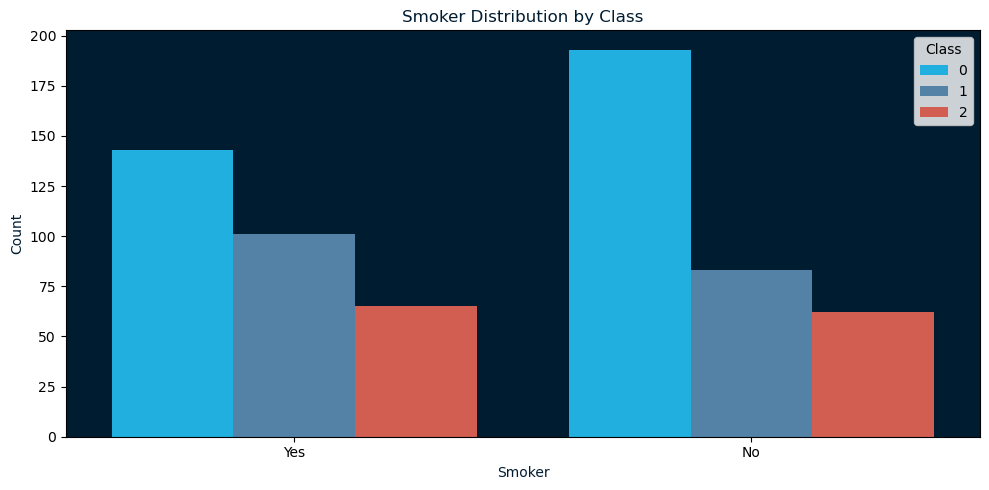

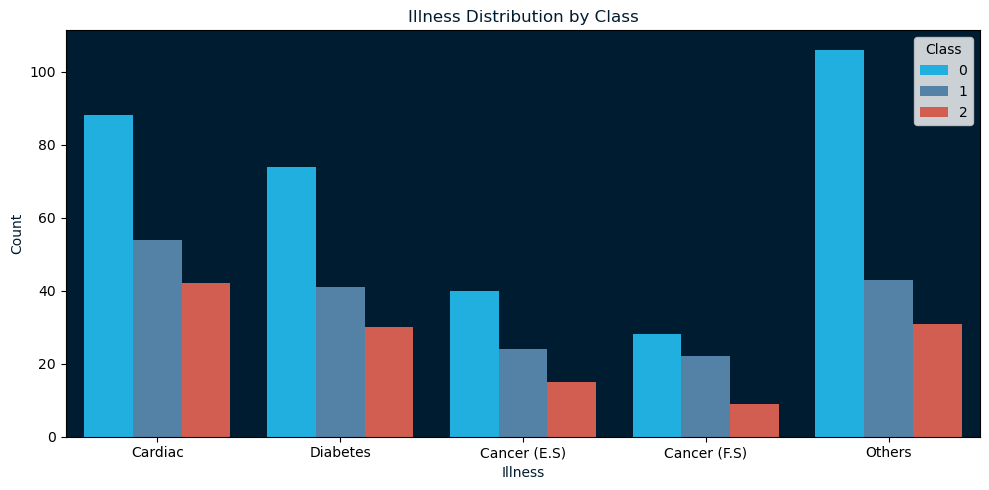

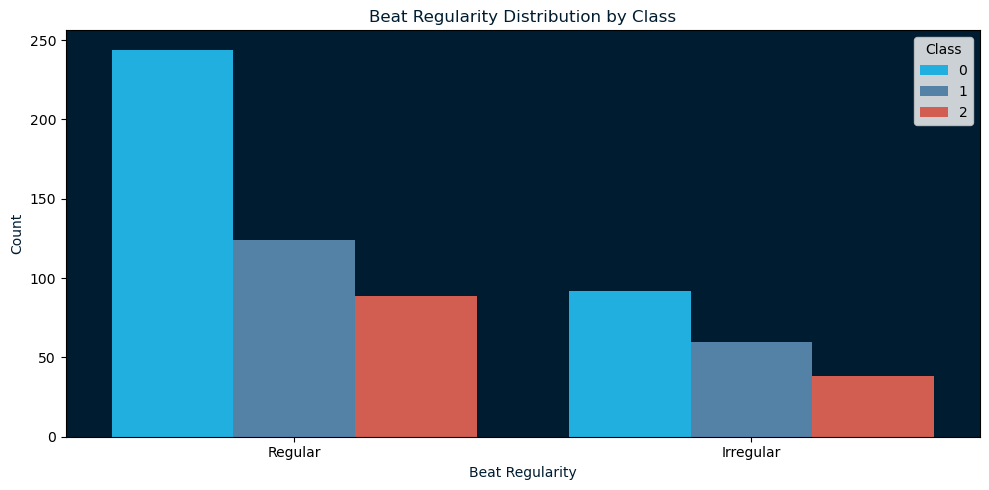

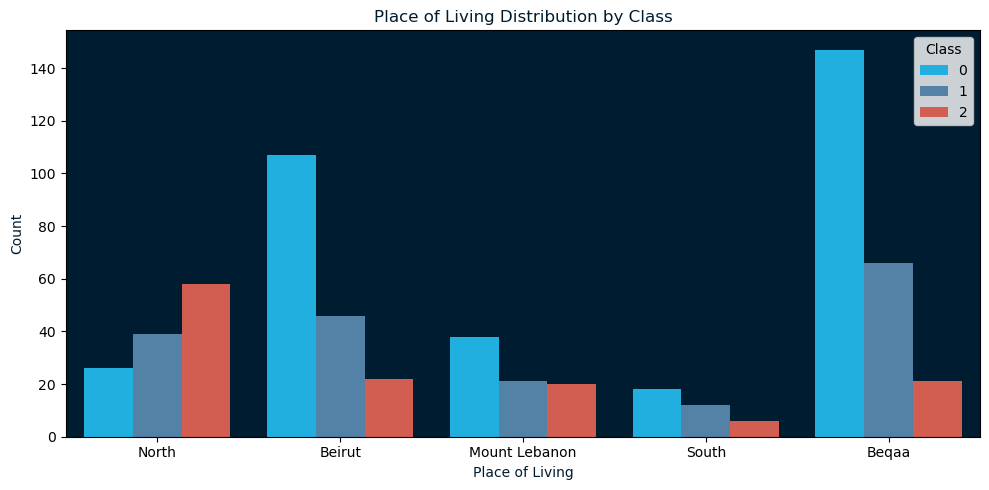

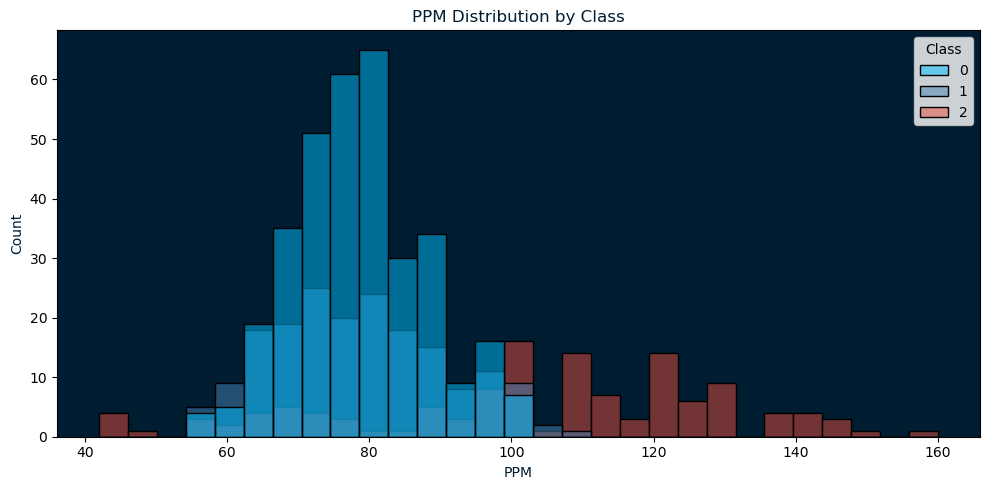

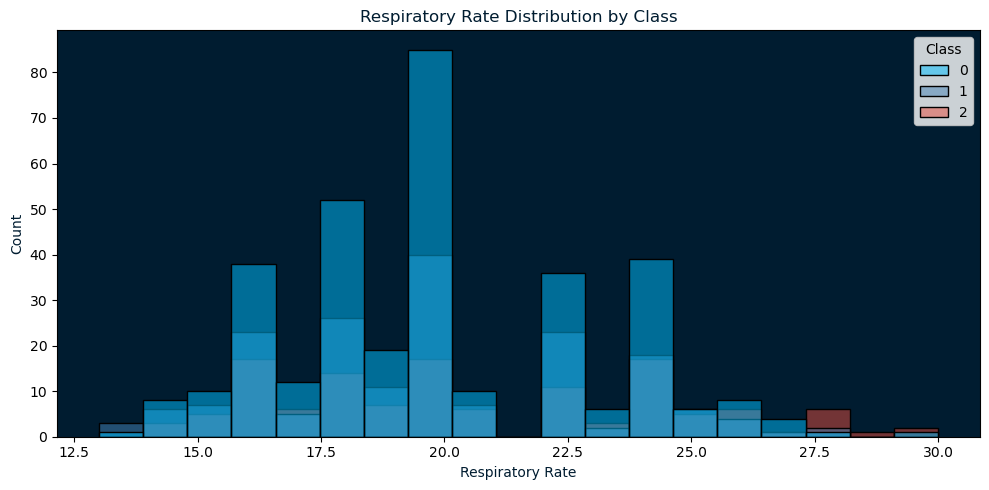

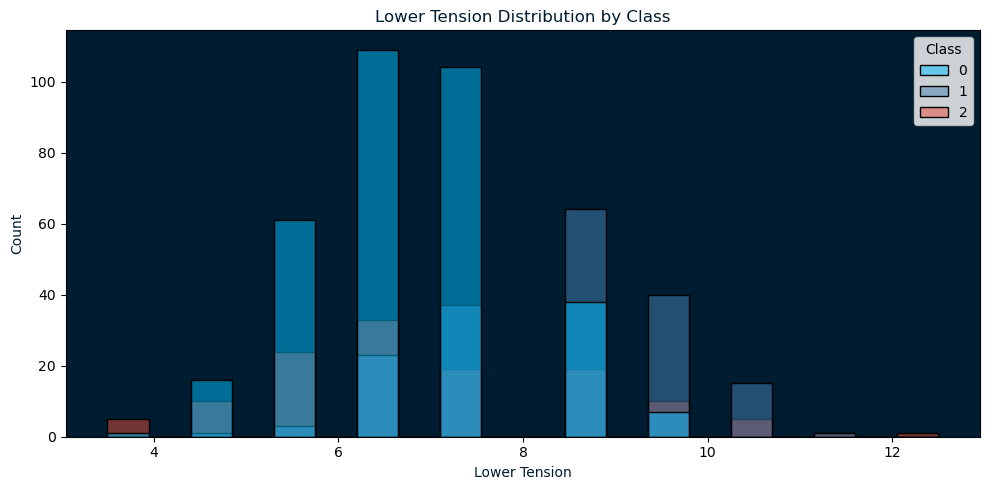

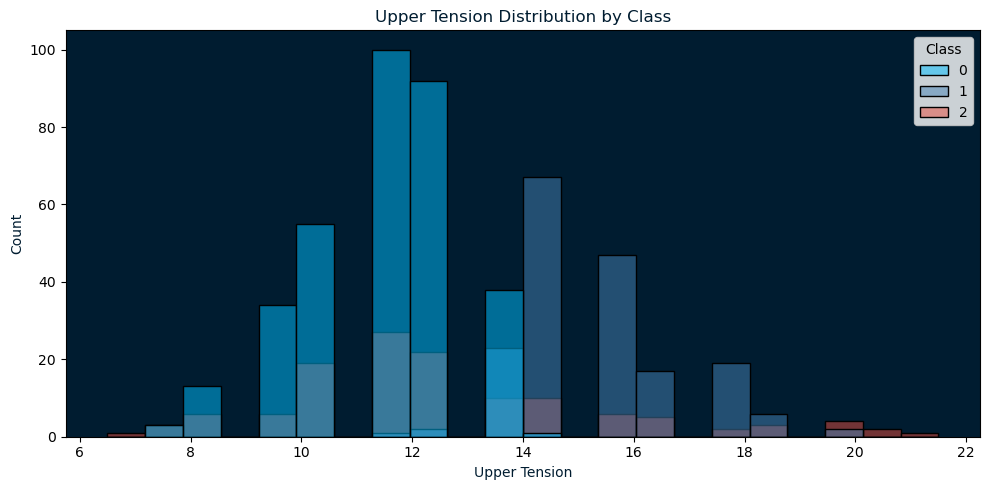

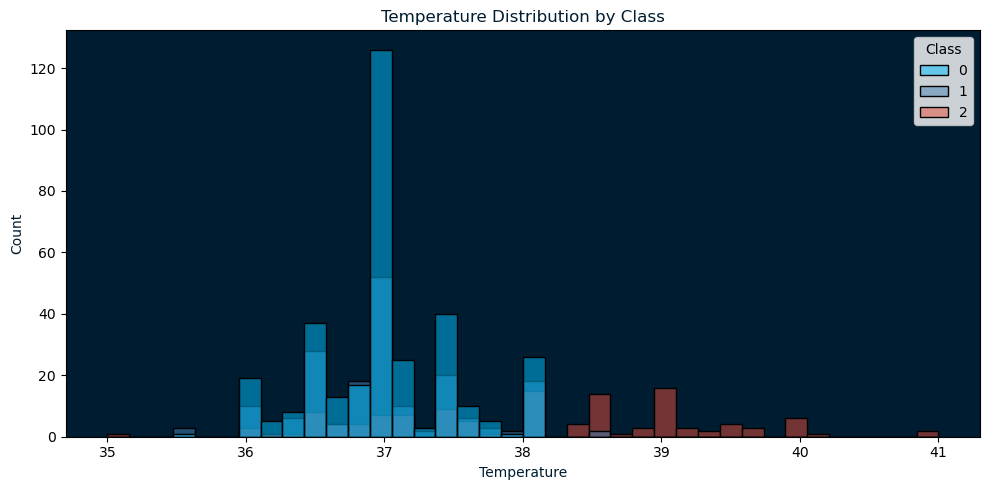

In [102]:
myModel.profile_data()

### 

## Running Different Supervised Models and Comparing Performance

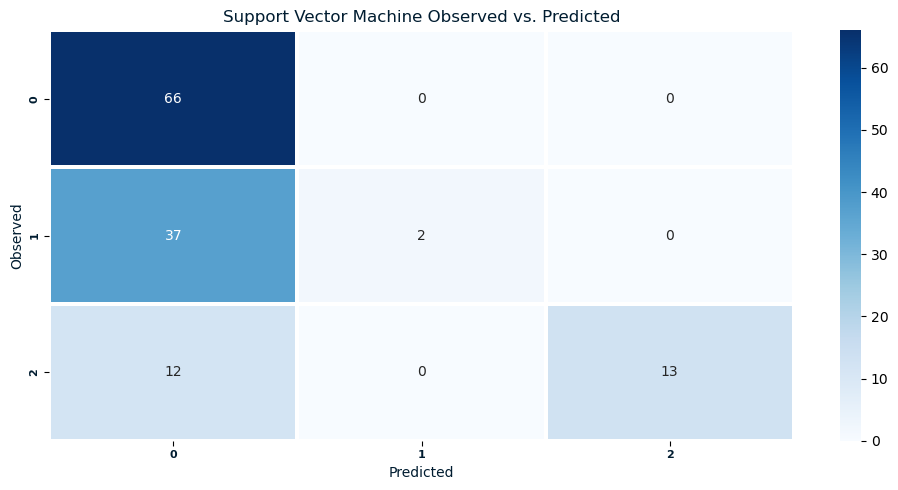

  Model Evaluation:
	Accuracy: 62.30769230769231 %
	Sensitivity: 62.30769230769231 %
	Precision: 78.36789297658864 %


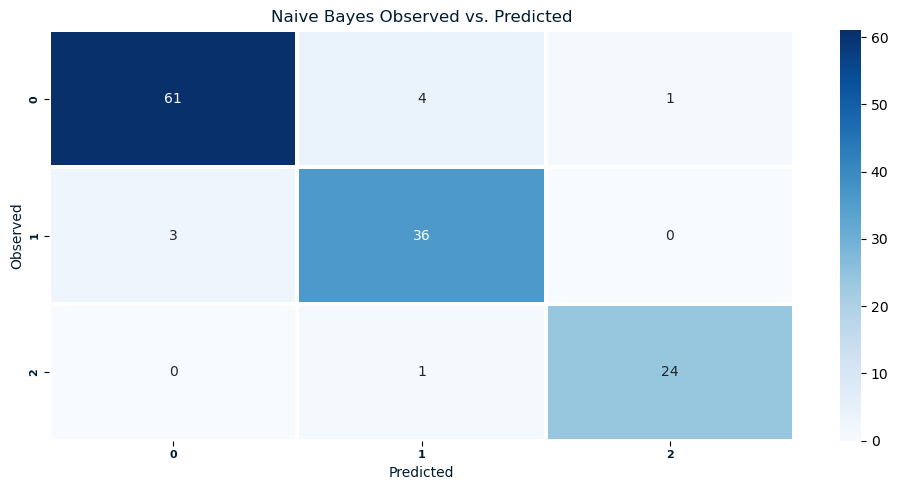

  Model Evaluation:
	Accuracy: 93.07692307692308 %
	Sensitivity: 93.07692307692308 %
	Precision: 93.19242495309568 %


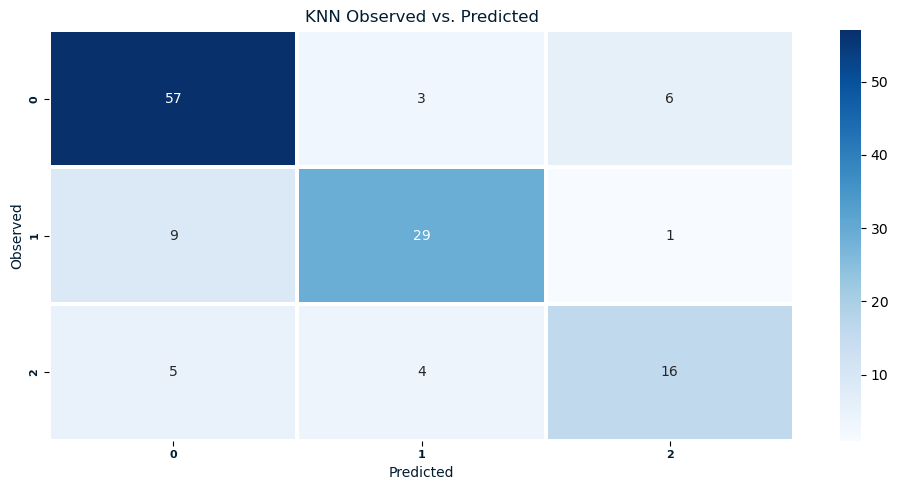

  Model Evaluation:
	Accuracy: 78.46153846153847 %
	Sensitivity: 78.46153846153847 %
	Precision: 78.30298962111577 %


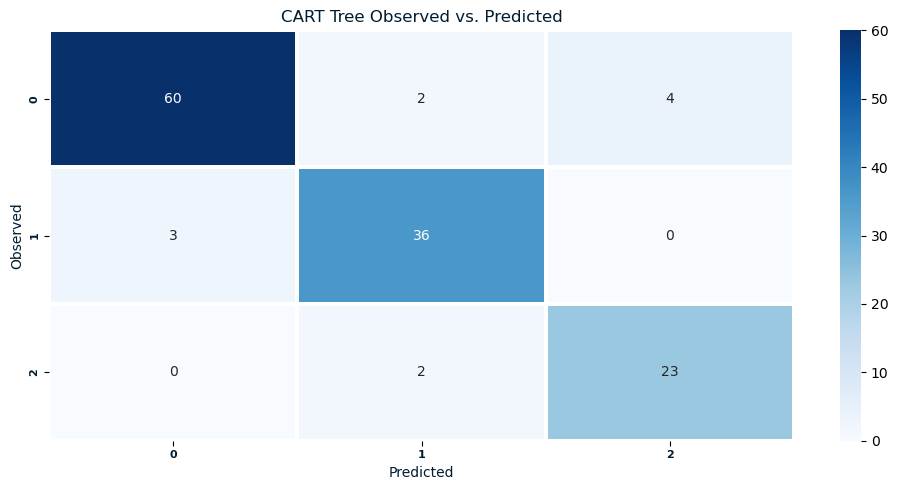

  Model Evaluation:
	Accuracy: 91.53846153846153 %
	Sensitivity: 91.53846153846153 %
	Precision: 91.73341473341475 %
------------------------------------------------------------------------------------------------------------------------------
 Comparing Models
	Classification Accuracy:
	Support Vector Machine: 62.30769230769231 %
	Naive Bayes: 93.07692307692308 %
	KNN: 78.46153846153847 %
	CART Tree: 91.53846153846153 %
  Best Model to predict Class: Naive Bayes 


In [103]:
myModel.apply_supervised()